In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"C:\Users\emper\OneDrive\Desktop\Customer Acquisition Cost Analysis\cac.csv")

df.head()


,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers
0,CUST0001,Email Marketing,3489.027844,16
1,CUST0002,Online Ads,1107.865808,33
2,CUST0003,Social Media,2576.081025,44
3,CUST0004,Online Ads,3257.567932,32
4,CUST0005,Email Marketing,1108.408185,13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        500 non-null    object 
 1   Marketing_Channel  500 non-null    object 
 2   Marketing_Spend    500 non-null    float64
 3   New_Customers      500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [8]:
# Creating a new column for Customer Acquisition Cost (CAC)
df['CAC'] = df['Marketing_Spend']/ df['New_Customers']
# Creating a new column for Conversion Rate
df['Conversion_Rate'] = df['New_Customers'] / df['Marketing_Spend'] * 100

df.head()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers,CAC,Conversion_Rate
0,CUST0001,Email Marketing,3489.027844,16,218.064240,0.458580
1,CUST0002,Online Ads,1107.865808,33,33.571691,2.978700
2,CUST0003,Social Media,2576.081025,44,58.547296,1.708021
3,CUST0004,Online Ads,3257.567932,32,101.798998,0.982328
4,CUST0005,Email Marketing,1108.408185,13,85.262168,1.172853


### **Conversion Rate**

-   Conversion Rate refers to the percentage of potential customers who take a desired action


In [9]:
df_conversion = df.groupby('Marketing_Channel')['Conversion_Rate'].mean().reset_index()
df_conversion = df_conversion.sort_values(by='Conversion_Rate', ascending=False)

df_conversion

,Marketing_Channel,Conversion_Rate
1,Online Ads,1.210954
0,Email Marketing,1.146716
2,Referral,1.144832
3,Social Media,1.135137


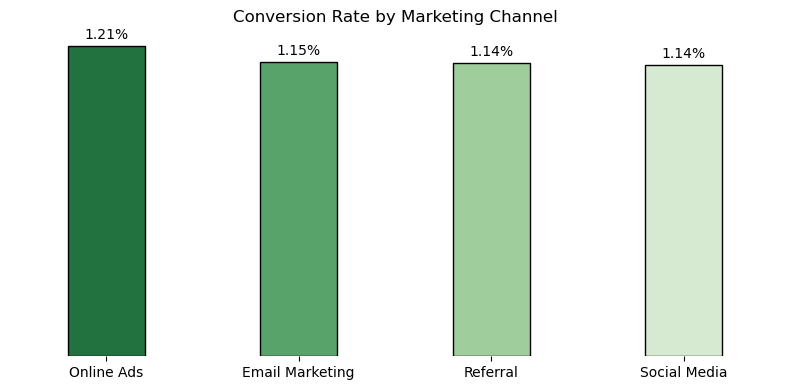

In [10]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(
        data=df_conversion,
        x='Marketing_Channel',
        y='Conversion_Rate',
        palette='Greens_r',
        edgecolor='black',
        width=0.4,
        ci=None
)

# Add value labels above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=3)


plt.title('Conversion Rate by Marketing Channel')
plt.ylabel(None)
plt.xlabel(None)
ax.tick_params(left=False, labelleft=False)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

- **Online Ads** has the highest conversion rate at **1.21%**, making it the most effective channel in terms of converting marketing spend into new customers.
- **Email Marketing**, **Referral**, and **Social Media** have similar conversion rates, ranging from **1.14% to 1.15%**.
- While Online Ads outperforms the other channels slightly, the differences are relatively small, indicating that all channels are reasonably effective at converting leads into customers.

#### Key Observations:
1. **Channel Performance**:
   - **Online Ads**: Leads with the highest conversion rate, suggesting strong targeting or ad creatives.
   - **Email Marketing, Referral, Social Media**: Perform comparably, showing consistent but slightly lower conversion rates.

2. **Efficiency**:
   - Online Ads demonstrates a slight edge in efficiency, converting more effectively than other channels.
   - The similarity in conversion rates across Email Marketing, Referral, and Social Media suggests these channels may require further optimization to match Online Ads' performance.

3. **Strategic Implications**:
   - **Focus on Online Ads**: Allocate more budget to this channel due to its higher conversion rate.
   - **Optimize Other Channels**: Investigate why Email Marketing, Referral, and Social Media have slightly lower conversion rates and explore ways to improve them.
_________________